# DAT210x - Programming with Python for DS

## Module5- Lab2

The spirit of data science includes exploration, traversing the unknown, and applying a deep understanding of the challenge you're facing. In an academic setting, it's hard to duplicate these tasks, but this lab will attempt to take a few steps away from the traditional, textbook, "plug the equation in" pattern, so you can get a taste of what analyzing data in the real world is all about.

After the September 11 attacks, a series of secret regulations, laws, and processes were enacted, perhaps to better protect the citizens of the United States. These processes continued through president Bush's term and were renewed and strengthened during the Obama administration. Then, on May 24, 2006, the United States Foreign Intelligence Surveillance Court (FISC) made a fundamental shift in its approach to Section 215 of the Patriot Act, permitting the FBI to compel production of "business records" relevant to terrorism investigations, which are shared with the NSA. The court now defined as business records the entirety of a telephone company's call database, also known as Call Detail Records (CDR or metadata).

News of this came to public light after an ex-NSA contractor leaked the information, and a few more questions were raised when it was further discovered that not just the call records of suspected terrorists were being collected in bulk... but perhaps the entirety of Americans as a whole. After all, if you know someone who knows someone who knows someone, your private records are relevant to a terrorism investigation. The white house quickly reassured the public in a press release that "Nobody is listening to your telephone calls," since, "that's not what this program is about." The public was greatly relieved.

The questions you'll be exploring in this lab assignment using K-Means are: exactly how useful is telephone metadata? It must have some use, otherwise the government wouldn't have invested however many millions they did into it secretly collecting it from phone carriers. Also what kind of intelligence can you extract from CDR metadata besides its face value?

You will be using a sample CDR dataset generated for 10 people living in the Dallas, Texas metroplex area. Your task will be to attempt to do what many researchers have already successfully done - partly de-anonymize the CDR data. People generally behave in predictable manners, moving from home to work with a few errands in between. With enough call data, given a few K-locations of interest, K-Means should be able to isolate rather easily the geolocations where a person spends the most of their time.

Note: to safeguard from doxing people, the CDR dataset you'll be using for this assignment was generated using the tools available in the Dive Deeper section. CDRs are at least supposed to be protected by privacy laws, and are the basis for proprietary revenue calculations. In reality, there are quite a few public CDRs out there. Much information can be discerned from them such as social networks, criminal acts, and believe it or not, even the spread of diseases as was demonstrated by Flowminder Foundation paper on Ebola.  

Open up the starter code in /Module5/Module5 - Lab2.ipynb and read through it all. It's long, so make sure you understand everything that is being asked for you before proceeding.
Load up the CDR dataset from /Module5/Datasets/CDR.csv. Do your due diligence to make sure it's been loaded correctly and all the features and rows match up.
Pick the first unique user in the list to examine. Follow the steps in the assignment file to approximate where the user lives.
Once you have a (Latitude, Longitude) coordinate pair, drop them into Google Maps. Just do a search for the "{Lat, Lon}". So if your centroid is located at Longitude = -96.949246 and Latitude = 32.953856, then do a maps search for "32.953856, -96.949246".
Answer the questions below.

Start by importing whatever you need to import in order to make this lab work:

In [199]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

### CDRs

A [call detail record](https://en.wikipedia.org/wiki/Call_detail_record) (CDR) is a data record produced by a telephone exchange or other telecommunications equipment that documents the details of a telephone call or other telecommunications transaction (e.g., text message) that passes through that facility or device.

The record contains various attributes of the call, such as time, duration, completion status, source number, and destination number. It is the automated equivalent of the paper toll tickets that were written and timed by operators for long-distance calls in a manual telephone exchange.

The dataset we've curated for you contains call records for 10 people, tracked over the course of 3 years. Your job in this assignment is to find out where each of these people likely live and where they work at!

Start by loading up the dataset and taking a peek at its head. You can convert date-strings to real date-time objects using `pd.to_datetime`, and the times using `pd.to_timedelta`:

In [200]:
df = pd.read_csv('Datasets/CDR.csv')
df.head(3)

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389


Create a distinct list of `In` phone numbers (people) and store the values in a regular python list. Make sure the numbers appear in your list in the same order they appear in your dataframe; but only keep a single copy of each number. [This link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html) might also be helpful.

In [201]:
lst_phone_in = df['In'].unique().tolist()
lst_phone_in[:3]

[4638472273, 1559410755, 4931532174]

Create a slice named `user1` that filters to _only_ include dataset records where the `In` feature (user's phone number) is equal to the first number on your unique list above, i.e., the very first number in the dataset:

In [202]:
user1 = df.where(df.In.isin(lst_phone_in))

Let's go ahead and plot all the call locations:

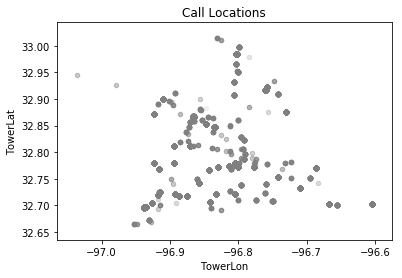

In [203]:
user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
plt.show()

INFO: The locations map above should be too "busy" to really wrap your head around. This is where domain expertise comes into play. Your intuition can direct you by knowing people are likely to behave differently on weekends vs on weekdays:

#### On Weekends
1. People probably don't go into work
1. They probably sleep in late on Saturday
1. They probably run a bunch of random errands, since they couldn't during the week
1. They should be home, at least during the very late hours, e.g. 1-4 AM

#### On Weekdays
1. People probably are at work during normal working hours
1. They probably are at home in the early morning and during the late night
1. They probably spend time commuting between work and home everyday

Add more filters to the `user1` slice you created. Add bitwise logic so that you only examine records that _came in_ on weekends (sat/sun):

In [204]:
user1.CallTime = pd.to_timedelta(user1.CallTime)

In [205]:
# user1 = user1[(pd.to_numeric(user1.CallTime.str.split(':').str.get(0)) >= 22) | (pd.to_numeric(user1.CallTime.str.split(':').str.get(0)) <= 6)]
# print(pd.to_timedelta(user1.CallTime) > '06:00:00')
# user1.CallTime.apply(lambda x: x.split(':')[0])
user1 = user1[user1.DOW.isin(['Sat', 'Sun'])]
user1 = user1[(user1.CallTime <= '06:00:00') | (user1.CallTime >= '22:00:00')]


Further filter `user1` down for calls that came in either before 6AM OR after 10pm (22:00:00). Even if you didn't convert your times from string objects to timedeltas, you can still use `<` and `>` to compare the string times as long as you code them as [military time strings](https://en.wikipedia.org/wiki/24-hour_clock), eg: "06:00:00", "22:00:00": 

You may also want to review the Data Manipulation section for this. Once you have your filtered slice, print out its length:

In [207]:
user1['In'] == 4638472273

36       False
39       False
40       False
56       False
108      False
109      False
121      False
144      False
148      False
157      False
552      False
559      False
569      False
595      False
940       True
954      False
975      False
984      False
989      False
1065     False
1080     False
1477     False
1503     False
1508     False
1519     False
1523     False
1538     False
1875      True
1945     False
1994     False
         ...  
49302    False
49342    False
49343    False
49805    False
50216    False
50247    False
50638    False
50664    False
50683    False
50697    False
50723    False
50729    False
50740    False
51148    False
51181    False
51510    False
51540    False
51547    False
51563    False
51586     True
51603    False
51619    False
51661    False
52014    False
52085    False
52120    False
52127    False
52510    False
52994    False
53052    False
Name: In, Length: 457, dtype: bool

Visualize the dataframe with a scatter plot as a sanity check. Since you're [familiar with maps](https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude), you know well that your X-Coordinate should be Longitude, and your Y coordinate should be the tower Latitude. Check the dataset headers for proper column feature names.
 
At this point, you don't yet know exactly where the user is located just based off the cell phone tower position data; but considering the below are for Calls that arrived in the twilight hours of weekends, it's likely that wherever they are bunched up is probably near where the caller's residence:

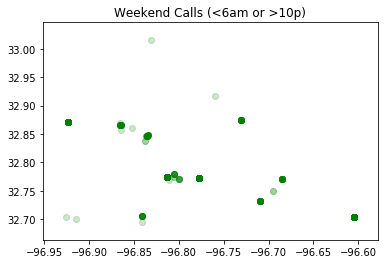

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (<6am or >10p)')
plt.show()

Run K-Means with a `K=1`. There really should only be a single area of concentration. If you notice multiple areas that are "hot" (multiple areas the user spends a lot of time at that are FAR apart from one another), then increase `K=2`, with the goal being that one of the centroids will sweep up the annoying outliers; and the other will zero in on the user's approximate home location. Or rather the location of the cell tower closest to their home.....

Be sure to only feed in Lat and Lon coordinates to the KMeans algorithm, since none of the other data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale, no feature scaling is required. Print out the centroid locations and add them onto your scatter plot. Use a distinguishable marker and color.

Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.

In [211]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.TowerLon, df.TowerLat, marker='o', c='g', alpha=0.3)
 
    df = df[['TowerLon', 'TowerLat']]
    model = KMeans(n_clusters=2)
    model.fit(df.values)

    centroids = model.cluster_centers_
    print(centroids)
    
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.8, linewidths=3, s=169)
    plt.show()

    

[[-96.64997126  32.72449782]
 [-96.84009555  32.81736755]]


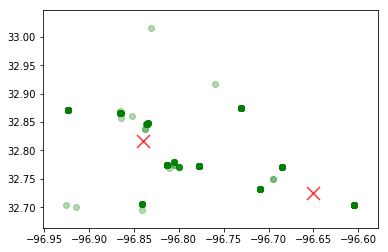

In [212]:
doKMeans(user1)

Now that you have a system in place, repeat the above steps for all 10 individuals in the dataset, being sure to record their approximate home locations. You might want to use a for-loop, unless you enjoy copying and pasting:

[[-96.70944573  32.73164942]
 [-96.694722    32.750556  ]]


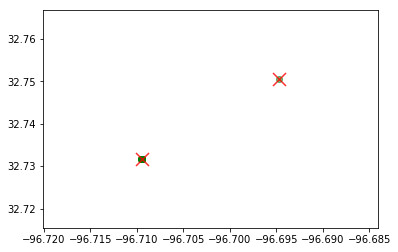

In [213]:
doKMeans(user1[user1['In'] == 4638472273])